**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


2022-09-10 06:26:13.298356: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-10 06:26:13.298601: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

/tmp/ipykernel_11/3295362500.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


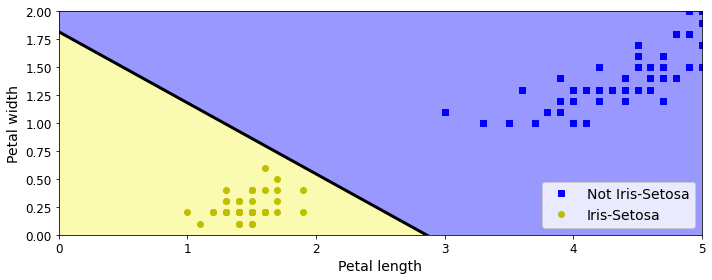

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


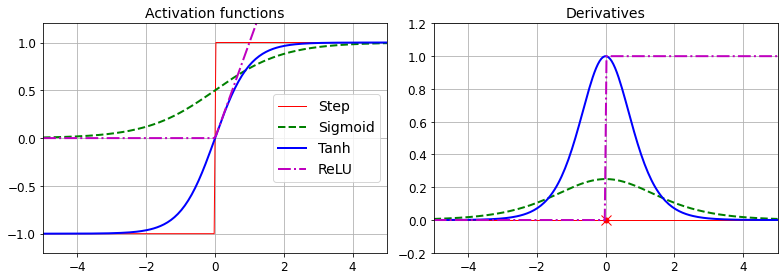

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

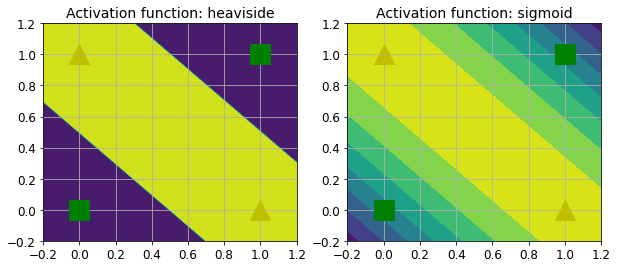

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.9.2'

In [11]:
keras.__version__

'2.9.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [14]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [15]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [16]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

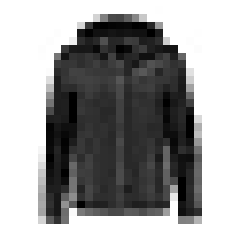

In [17]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [18]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [19]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [20]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [21]:
X_valid.shape

(5000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


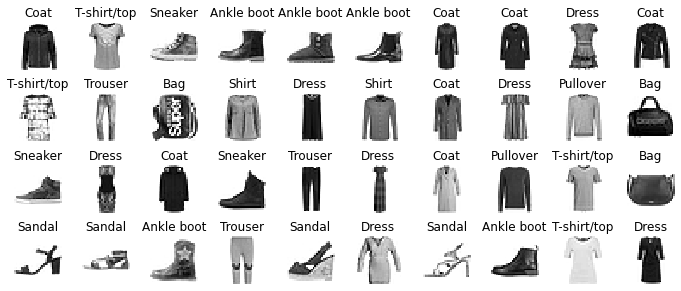

In [23]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

2022-09-09 14:39:23.715185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-09 14:39:23.715260: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-09 14:39:23.715305: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c95e3c8a0650): /proc/driver/nvidia/version does not exist
2022-09-09 14:39:23.716274: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.layers

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


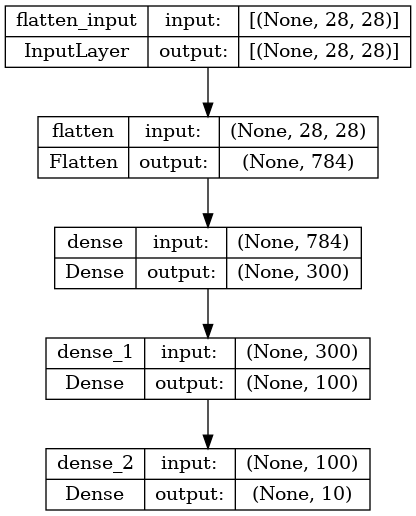

In [29]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer(hidden1.name) is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [38]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5212 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4349 - val_accuracy: 0.8530
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4392 - accuracy: 0.8458 - val_loss: 0.5352 - val_accuracy: 0.7978
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4124 - accuracy: 0.8565 - val_loss: 0.3917 - val_accuracy: 0.8648
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3707 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3632 - accuracy: 0.8712 - val_loss: 0.3625 - val_accuracy:

In [39]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [41]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


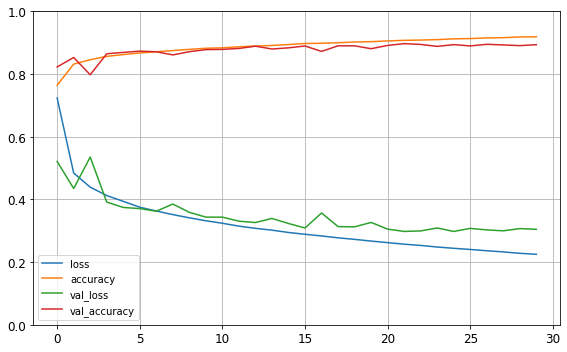

In [42]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3387 - accuracy: 0.8823


[0.3387218117713928, 0.8823000192642212]

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 96ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [45]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 38ms/step


array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


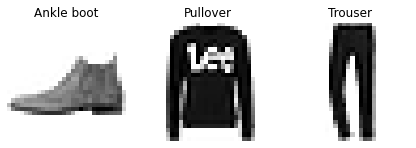

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [50]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4656

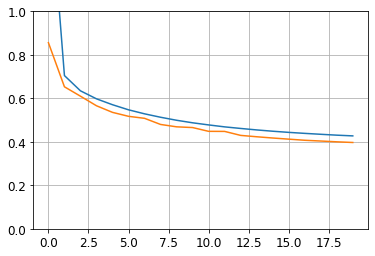

In [53]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [54]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [58]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4659 - val_loss: 0.4313

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4644 - val_loss: 0.4315

Adding an auxiliary output for regularization:

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [64]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [65]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - val_loss

In [66]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 62ms/step


# The subclassing API

In [67]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [68]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

# Saving and Restoring

In [69]:
np.random.seed(42)
tf.random.set_seed(42)

In [70]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [72]:
model.save("my_keras_model.h5")

In [73]:
model = keras.models.load_model("my_keras_model.h5")

In [74]:
model.predict(X_new)

1/1 [==============================] - 0s 61ms/step


array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [75]:
model.save_weights("my_keras_weights.ckpt")

In [76]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [77]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [79]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.4382


In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3976 - val_lo

In [81]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [82]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

351/363 [============================>.] - ETA: 0s - loss: 0.3291
val/train: 1.08
363/363 [==============================] - 1s 2ms/step - loss: 0.3302 - val_loss: 0.3559


# TensorBoard

In [83]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [84]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_09_09-15_01_27'

In [85]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [86]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [89]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3731 - val_loss: 0.3525
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3714 - val_loss: 0.3572
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3700 - val_loss: 0.3500
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3685 - val_loss: 0.3481
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3671 - val_loss: 0.3531
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3658 - val_loss: 0.3532
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3646 - val_loss: 0.3489
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3635 - val_loss: 0.3480
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3624 - val_loss: 0.3563
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3612 - val_loss: 0.3550

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [90]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [91]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2022_09_09-15_06_53'

In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [93]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [94]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9819 - val_loss: 0.9281
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9240 - val_loss: 0.9089
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9179 - val_loss: 0.8815
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8950 - val_loss: 0.9007
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9150 - val_loss: 0.8734
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8921 - val_loss: 0.8

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [95]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [98]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/tmp/ipykernel_11/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [99]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4060 - val_l

In [100]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3412


In [101]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 60ms/step


In [102]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
242/242 [========

Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3678 - val_loss: 0.8462
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3610 - val_loss: 0.8724
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3554 - val_loss: 0.9645
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3525 - val_loss: 0.7225
Epoch 11/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3475 - val_loss: 0.7257
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3442 - val_loss: 0.7216
Epoch 13/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3422 - val_loss: 0.8440
Epoch 14/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3650
[CV] END learning_rate=0.005432590230265343, n_hidden=2, n_neurons=94; total time=   8.3s
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0015 - val_loss: 2.9433
Epoch 2/100
242

Epoch 16/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6395 - val_loss: 1.5300
Epoch 17/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6303 - val_loss: 1.3410
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6217 - val_loss: 1.1762
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6133 - val_loss: 1.0345
Epoch 20/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6055 - val_loss: 0.9174
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5980 - val_loss: 0.8153
Epoch 22/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5908 - val_loss: 0.7363
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5839 - val_loss: 0.6696
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5774 - val_loss: 0.6187
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5711

Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4607 - val_loss: 0.4349
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4588 - val_loss: 0.4330
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4569 - val_loss: 0.4311
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4550 - val_loss: 0.4291
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4532 - val_loss: 0.4277
Epoch 61/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4515 - val_loss: 0.4257
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4498 - val_loss: 0.4241
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4482 - val_loss: 0.4224
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4466 - val_loss: 0.4208
Epoch 65/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4451

Epoch 35/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3527 - val_loss: 0.3474
Epoch 36/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3508 - val_loss: 0.3944
Epoch 37/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3507 - val_loss: 0.4402
Epoch 38/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3502 - val_loss: 0.4723
Epoch 39/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3496 - val_loss: 0.3722
Epoch 40/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3481 - val_loss: 0.4019
Epoch 41/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3467 - val_loss: 0.3376
Epoch 42/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3449 - val_loss: 0.3377
Epoch 43/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3450 - val_loss: 0.3354
Epoch 44/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3433

242/242 [==============================] - 0s 2ms/step - loss: 4.2841 - val_loss: 559.4487
Epoch 22/100
121/121 [==============================] - 0s 1ms/step - loss: 0.6226
[CV] END learning_rate=0.01824796188192035, n_hidden=0, n_neurons=40; total time=  21.0s
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.2632 - val_loss: 1.4543
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6364 - val_loss: 0.9557
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5396 - val_loss: 0.4628
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4783 - val_loss: 0.4214
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4400 - val_loss: 0.3984
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4169 - val_loss: 0.4056
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4004 - val_loss: 0.3741
Epoch 8/100
242/242 [=========

242/242 [==============================] - 1s 2ms/step - loss: 0.3230 - val_loss: 0.3313
Epoch 40/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3194 - val_loss: 0.4033
Epoch 41/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3181 - val_loss: 0.3345
Epoch 42/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3165 - val_loss: 0.3650
Epoch 43/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3162 - val_loss: 0.3311
Epoch 44/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.3684
Epoch 45/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3152 - val_loss: 0.3090
Epoch 46/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3128 - val_loss: 0.3821
Epoch 47/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3118 - val_loss: 0.3187
Epoch 48/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3118 - val_loss: 

Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3825 - val_loss: 0.3924
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3815 - val_loss: 0.3611
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3800 - val_loss: 0.4182
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3792 - val_loss: 0.3539
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3779 - val_loss: 0.4403
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3769 - val_loss: 0.3551
Epoch 40/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3757 - val_loss: 0.4125
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3748 - val_loss: 0.3665
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3735 - val_loss: 0.3591
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3730

Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3682 - val_loss: 0.3783
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3591 - val_loss: 0.4054
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3533 - val_loss: 0.3909
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3488 - val_loss: 0.3907
Epoch 11/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3445 - val_loss: 0.3554
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3395 - val_loss: 0.3610
Epoch 13/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3352 - val_loss: 0.3665
Epoch 14/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3334 - val_loss: 0.3635
Epoch 15/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3294 - val_loss: 0.3581
Epoch 16/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3272 - 

Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3524 - val_loss: 0.7273
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.9105
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3421 - val_loss: 0.6967
Epoch 11/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3364 - val_loss: 0.6960
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3327 - val_loss: 0.7798
Epoch 13/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3293 - val_loss: 0.8549
Epoch 14/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3525
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=   8.8s
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9177 - val_loss: 0.9196
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4767 - val_loss: 2.1025
Epoch 3/100
242

242/242 [==============================] - 1s 2ms/step - loss: 0.3190 - val_loss: 0.3409
Epoch 21/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3179 - val_loss: 0.3752
Epoch 22/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3181 - val_loss: 0.3093
Epoch 23/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3147 - val_loss: 0.3417
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3132 - val_loss: 0.3245
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3099 - val_loss: 0.3051
Epoch 26/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3072 - val_loss: 0.3033
Epoch 27/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3047 - val_loss: 0.4346
Epoch 28/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3079 - val_loss: 0.3420
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3058 - val_loss: 

Epoch 63/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2985 - val_loss: 0.3085
Epoch 64/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2963 - val_loss: 0.3977
Epoch 65/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2965 - val_loss: 0.2958
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3032 - val_loss: 0.3222
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2951 - val_loss: 0.3343
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2942 - val_loss: 0.3023
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2942 - val_loss: 0.3624
Epoch 70/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2968 - val_loss: 0.2944
Epoch 71/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2921 - val_loss: 0.3878
Epoch 72/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2922

In [101]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [102]:
rnd_search_cv.best_score_

-0.32039451599121094

In [103]:
rnd_search_cv.best_estimator_

In [104]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 436us/step - loss: 0.3029


-0.3028871417045593

In [105]:
model = rnd_search_cv.best_estimator_.model
model

In [106]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 446us/step - loss: 0.3029


0.3028871417045593

# Own solutions to exercises

## Exercise 10

In [2]:
import keras

mnist = keras.datasets.mnist.load_data()

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = mnist

In [16]:
X_valid = X_train_full[:5000]/255.0
X_train = X_train_full[5000:]/255.0
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

In [62]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = X_train_full[0].shape))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [61]:
model.summary()

Model: "sequential_5940"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5940 (Flatten)      (None, 784)               0         
                                                                 
 dense_17819 (Dense)         (None, 300)               235500    
                                                                 
 dense_17820 (Dense)         (None, 100)               30100     
                                                                 
 dense_17821 (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [72]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

In [75]:
history = model.fit(X_train, y_train, epochs = 100,
                   validation_data = (X_valid, y_valid),
                   callbacks = early_stopping_cb)

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0154 - accuracy: 0.9978 - val_loss: 0.0713 - val_accuracy: 0.9808
Epoch 2/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0145 - accuracy: 0.9979 - val_loss: 0.0707 - val_accuracy: 0.9806
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0139 - accuracy: 0.9981 - val_loss: 0.0710 - val_accuracy: 0.9802
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0132 - accuracy: 0.9983 - val_loss: 0.0754 - val_accuracy: 0.9786
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9985 - val_loss: 0.0707 - val_accuracy: 0.9804
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0120 - accuracy: 0.9987 - val_loss: 0.0730 - val_accuracy: 0.9808
Epoch 7/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0115 - accuracy: 0.9989 - val_loss: 0.0705 - val_ac

In [79]:
early_stopping_cb.best

0.07046763598918915

In [65]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.2378 - accuracy: 0.9753


[14.237828254699707, 0.9753000140190125]

In [71]:
history.history["loss"][-11]

0.01614544354379177

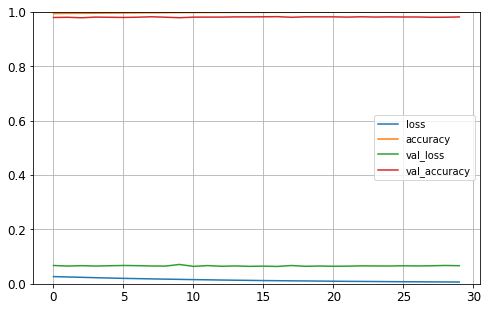

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [98]:
import math

learning_rate_min = 1e-3
learning_rate_max = 10
num_iterations = 1719

factor = math.exp(math.log(learning_rate_max/learning_rate_min)/num_iterations)

In [99]:
class LearningRateCallback(keras.callbacks.Callback):
    def __init__(self, factor):
        self._factor = factor
        self.rates = []
        self.losses = []
        
    def on_batch_end(self, batch, logs):
        self.rates.append(keras.backend.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        keras.backend.set_value(self.model.optimizer.learning_rate,
                                self.model.optimizer.learning_rate * self._factor)

In [131]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = X_train_full[0].shape))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))
    
optimizer = keras.optimizers.SGD(learning_rate = learning_rate_min)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = optimizer,
              metrics = ["accuracy"])
learning_rate_cb = LearningRateCallback(1.005)
history = model.fit(X_train, y_train, epochs = 1,
                    validation_data = (X_valid, y_valid),
                    callbacks=[learning_rate_cb])

1719/1719 [==============================] - 8s 4ms/step - loss: nan - accuracy: 0.5951 - val_loss: nan - val_accuracy: 0.0958


In [132]:
learning_rate_cb.rates[-1]

5.2636895

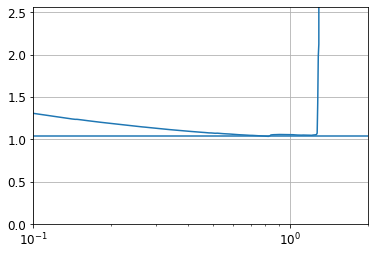

In [169]:
#plt.figure(figsize=(10, 7))

plt.plot(learning_rate_cb.rates, learning_rate_cb.losses)
plt.gca().set_xscale('log')
plt.hlines(min(learning_rate_cb.losses), min(learning_rate_cb.rates), max(learning_rate_cb.rates))
#plt.axis([min(learning_rate_cb.rates), max(learning_rate_cb.rates), 0, learning_rate_cb.losses[0]])
plt.axis([1e-1, 2, 0, learning_rate_cb.losses[0]])
plt.grid()

plt.show()

In [173]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = X_train_full[0].shape))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))
    
optimizer = keras.optimizers.SGD(learning_rate = 1e-1)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = optimizer,
              metrics = ["accuracy"])
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100,
                    validation_data = (X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2754 - accuracy: 0.9181 - val_loss: 0.1276 - val_accuracy: 0.9658
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1115 - accuracy: 0.9668 - val_loss: 0.0965 - val_accuracy: 0.9718
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0765 - val_accuracy: 0.9798
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0765 - val_accuracy: 0.9764
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0746 - val_accuracy: 0.9796
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0299 - accuracy: 0.9912 - val_loss: 0.0634 - val_accuracy: 0.9840
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 0.0680 - val_ac

In [174]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0614 - accuracy: 0.9804


[0.061420995742082596, 0.980400025844574]

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [143]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [144]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [145]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [146]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

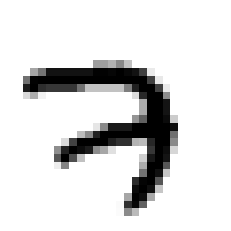

In [147]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [148]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [149]:
X_valid.shape

(5000, 28, 28)

In [150]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

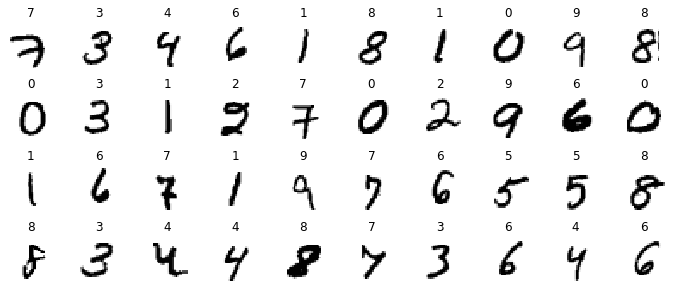

In [151]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [152]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [153]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [154]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [155]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [156]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.5951 - val_loss: nan - val_accuracy: 0.0958


We can now plot the loss as a function of the learning rate:

Text(0, 0.5, 'Loss')

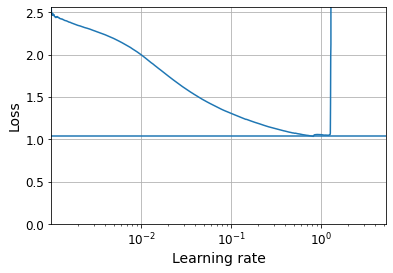

In [157]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [158]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [159]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [160]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [161]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [162]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2356 - accuracy: 0.9263 - val_loss: 0.1035 - val_accuracy: 0.9704
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0939 - accuracy: 0.9707 - val_loss: 0.0891 - val_accuracy: 0.9744
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0662 - accuracy: 0.9783 - val_loss: 0.0802 - val_accuracy: 0.9750
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0480 - accuracy: 0.9843 - val_loss: 0.0843 - val_accuracy: 0.9770
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.0918 - val_accuracy: 0.9742
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9906 - val_loss: 0.0687 - val_accuracy: 0.9834
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0826 - val_ac

In [163]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9796


[0.07572879642248154, 0.9796000123023987]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [128]:
%tensorboard --logdir=./my_mnist_logs --port=6006